In [1]:
import os
os.chdir("..")

In [2]:
import json

In [3]:
import h5py
import numpy as np
import pandas as pd

import umap
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt

# Load data

In [4]:
with open("data/ids_with_types.json", "r") as f:
    ids_with_types = json.load(f)

In [5]:
with h5py.File("data/embeddings_molecules_0.v224.h5", "r") as f:
    print("File keys:", f.keys())
    embeddings = np.array(f['embeddings'], dtype=np.float32)
    optimizers = np.array(f['optimizer'])

File keys: <KeysViewHDF5 ['embeddings', 'optimizer']>


In [6]:
embeddings.shape, len(ids_with_types)

((535063, 400), 535063)

# UMAP

In [7]:
sorted_labels = list(dict(sorted(ids_with_types.items(), key=lambda x: x[0])).values())
sorted_labels_df = pd.DataFrame(sorted_labels, columns=['label'])

In [8]:
reducer = umap.UMAP(
    n_neighbors=35,
    n_components=2,
    min_dist=0.008,
    metric='cosine',
)

emdeddings_2d = reducer.fit_transform(embeddings)

In [9]:
embeddings_df = pd.DataFrame(emdeddings_2d, columns=['x', 'y'])
embeddings_with_labels_df = pd.concat([embeddings_df,   sorted_labels_df], axis=1)

In [10]:
embeddings_with_labels_df

x          y           label
0        7.446120   2.965020         protein
1       -5.062602   3.334340         protein
2       14.686088   1.423650         protein
3        6.919925   4.526438         protein
4        3.782487   4.997303  small_molecule
...           ...        ...             ...
535058   8.329805  -1.485541         protein
535059   3.234822  -7.764148  small_molecule
535060   8.028608  14.205297         protein
535061   7.150379   6.389455  small_molecule
535062   4.042212   4.238191         protein

[535063 rows x 3 columns]

In [11]:
list(embeddings_with_labels_df.label.value_counts().index[::-1])

['rna', 'dna', 'protein', 'small_molecule']

In [26]:
sns.set(font_scale=2.5)

<Axes: xlabel='x', ylabel='y'>

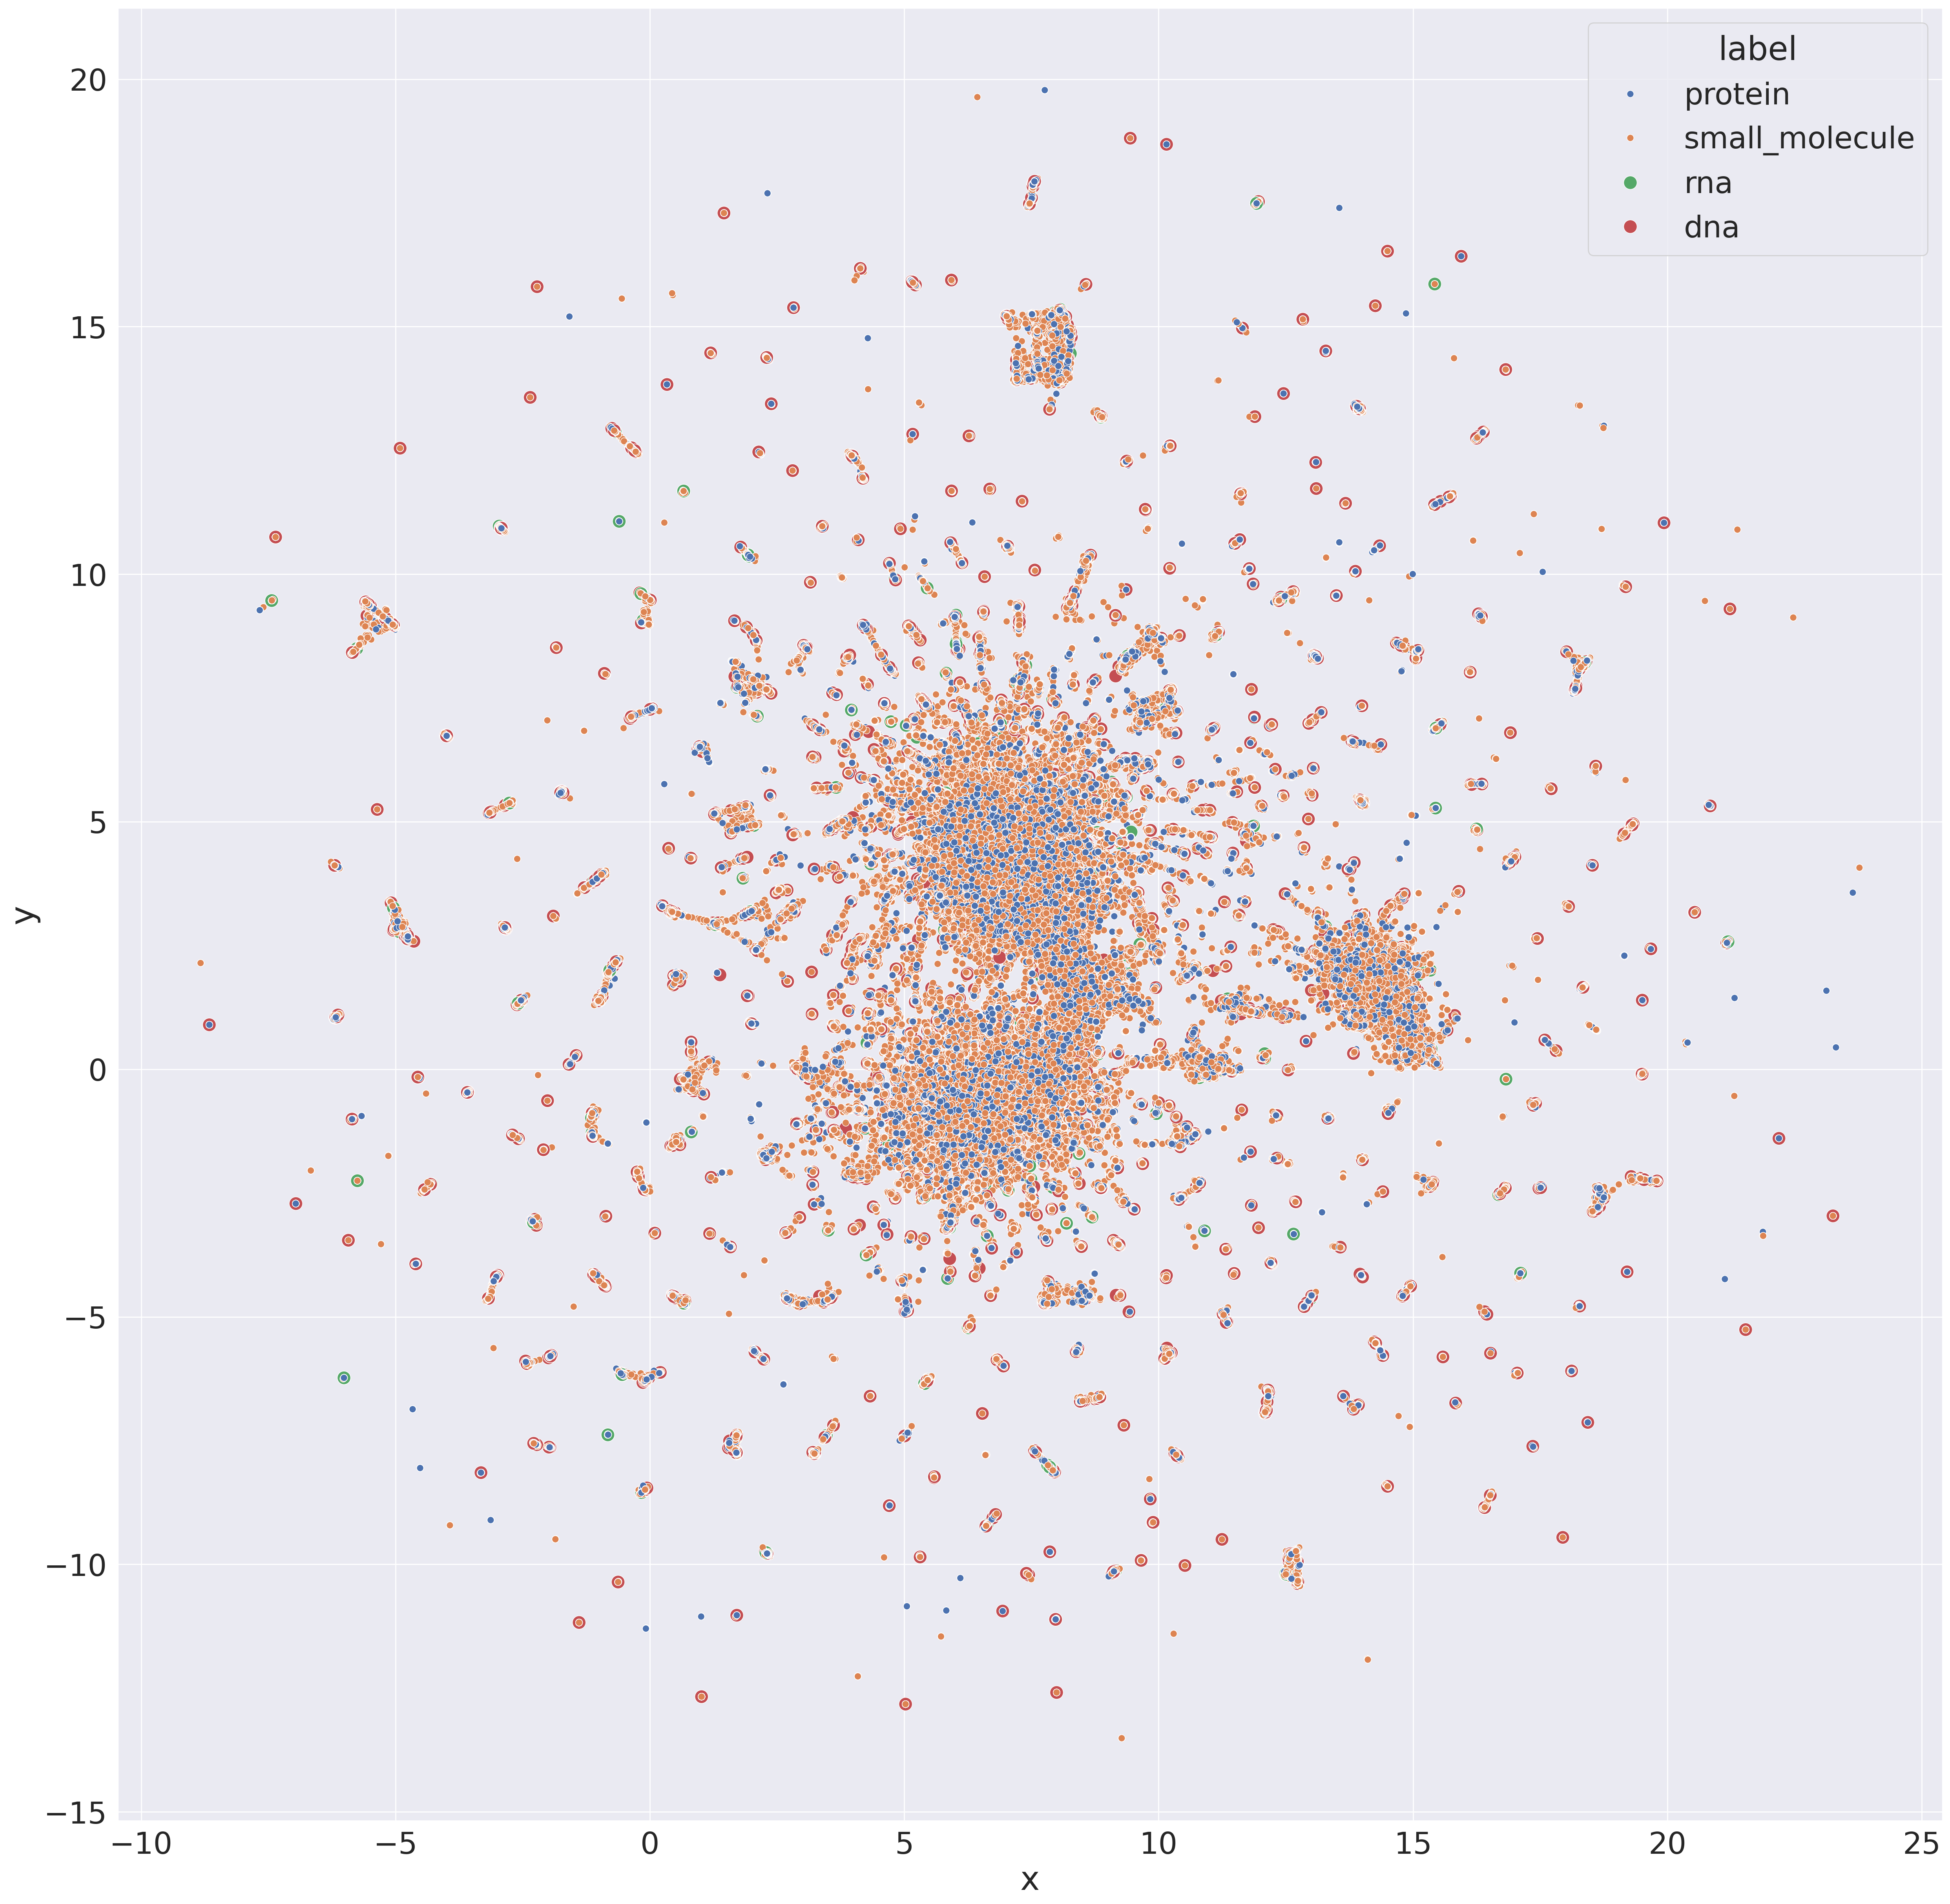

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(30, 30), dpi=200)

sns.scatterplot(
    embeddings_with_labels_df,
    x='x',
    y='y',
    hue='label',
    size='label',
    sizes={
        'small_molecule': 40,
        'protein': 40,
        'dna': 150,
        'rna': 150
    },
    ax=ax
    # size_order=list(embeddings_with_labels_df.label.value_counts().index[::-1]),
    )

In [28]:
fig.savefig('results/kge_embeddings_umap.png', dpi='figure')